In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
dftrain = pd.read_csv('train.csv')
dftest = pd.read_csv('test.csv')

In [4]:
dftrain.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [5]:
dftrain.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
dftrain.drop(["id"],axis=1,inplace=True)
dftest.drop(["id"],axis=1,inplace=True)

In [8]:
dftrain.info()
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Product ID               136429 non-null  object 
 1   Type                     136429 non-null  object 
 2   Air temperature [K]      136429 non-null  float64
 3   Process temperature [K]  136429 non-null  float64
 4   Rotational speed [rpm]   136429 non-null  int64  
 5   Torque [Nm]              136429 non-null  float64
 6   Tool wear [min]          136429 non-null  int64  
 7   Machine failure          136429 non-null  int64  
 8   TWF                      136429 non-null  int64  
 9   HDF                      136429 non-null  int64  
 10  PWF                      136429 non-null  int64  
 11  OSF                      136429 non-null  int64  
 12  RNF                      136429 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 13.5+ MB
<

In [9]:
#check the summation of number of unique values in column Product ID

dftrain['Product ID'].nunique()



9976

In [10]:
dftrain.drop(["Product ID"],axis=1,inplace=True)
dftest.drop(["Product ID"],axis=1,inplace=True)

In [11]:
dftrain.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

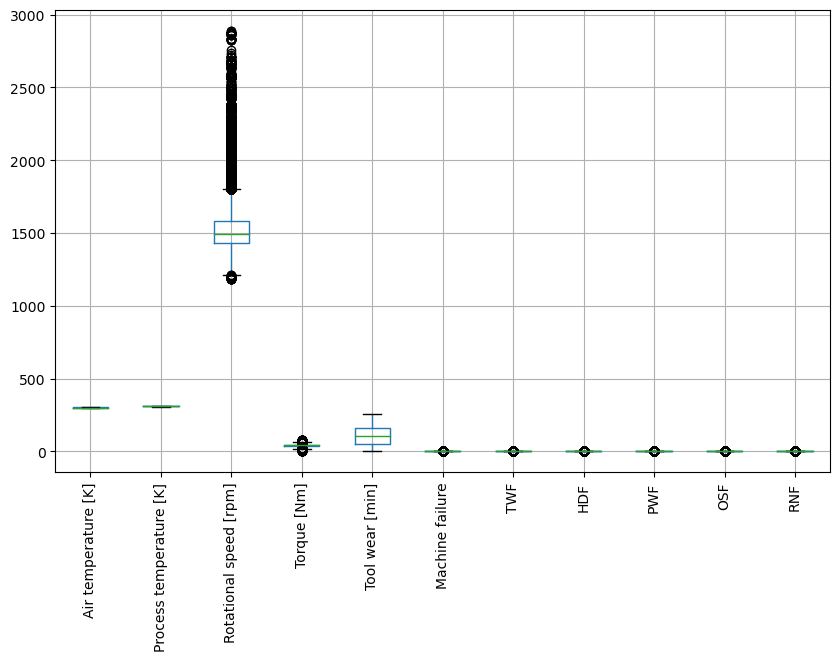

In [12]:
#check for outliners in numeric values

plt.figure(figsize=(10,6))
dftrain.boxplot(column=['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'])
plt.xticks(rotation=90)
plt.show()

In [13]:
#so rational Speed has a lot of outliners so i want to remove outliners

In [11]:
dftrain.drop(['Rotational speed [rpm]'],axis=1,inplace=True)
dftest.drop(['Rotational speed [rpm]'],axis=1,inplace=True)

In [12]:
dftrain.info()
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Type                     136429 non-null  object 
 1   Air temperature [K]      136429 non-null  float64
 2   Process temperature [K]  136429 non-null  float64
 3   Torque [Nm]              136429 non-null  float64
 4   Tool wear [min]          136429 non-null  int64  
 5   Machine failure          136429 non-null  int64  
 6   TWF                      136429 non-null  int64  
 7   HDF                      136429 non-null  int64  
 8   PWF                      136429 non-null  int64  
 9   OSF                      136429 non-null  int64  
 10  RNF                      136429 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 11.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90954 entries, 0 to 90953
Data columns (total 10 columns):
 #

KeyError: "None of [Index(['Rat_log'], dtype='object')] are in the [columns]"

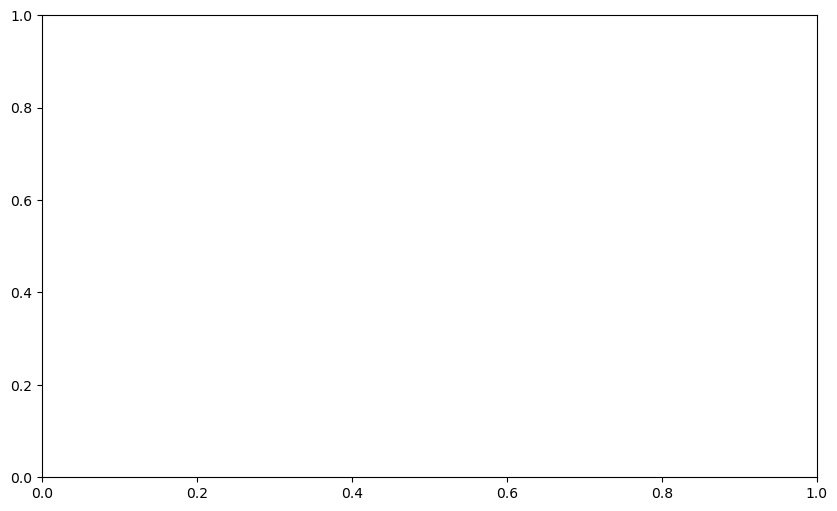

In [13]:
#check for outliners in Rat_log

plt.figure(figsize=(10,6))
dftrain.boxplot(column=['Rat_log'])
plt.xticks(rotation=90)
plt.show()

(array([1]), [Text(1, 0, 'Rat_log')])

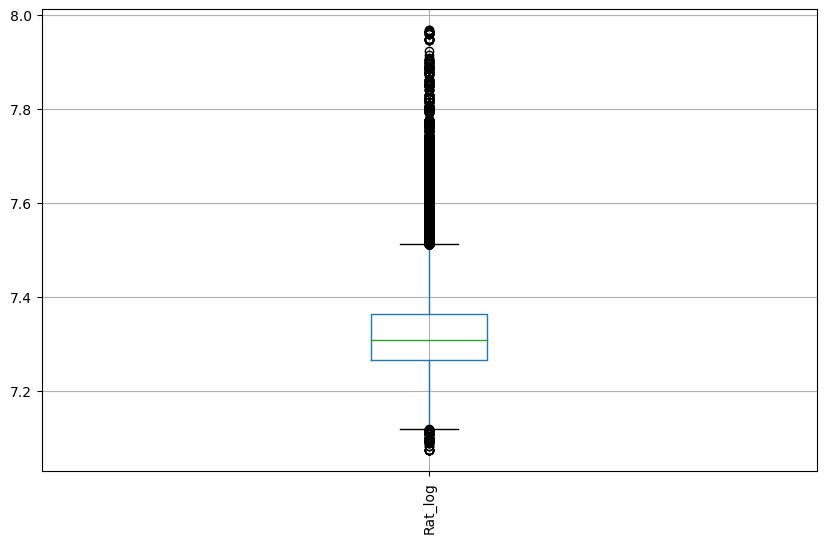

In [20]:
#check for outliners in Rat_log

plt.figure(figsize=(10,6))
dftrain.boxplot(column=['Rat_log'])
plt.xticks(rotation=90)


In [21]:
#now remove the outliners with iqr
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = dftrain['Rat_log'].quantile(0.25)
Q3 = dftrain['Rat_log'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1


# Determine the lower and upper bounds for outliers
lower_bound = Q1 - IQR
upper_bound = Q3 + IQR

# Identify outliers
outliers = dftrain[(dftrain['Rat_log'] < lower_bound) | (dftrain['Rat_log'] > upper_bound)]

# Remove outliers
dftrain = dftrain[(dftrain['Rat_log'] >= lower_bound) & (dftrain['Rat_log'] <= upper_bound)]


(array([1]), [Text(1, 0, 'Rat_log')])

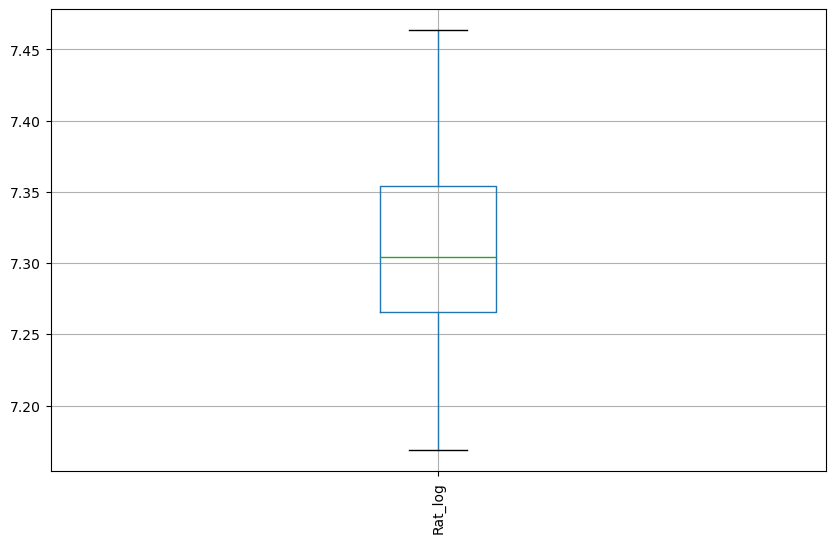

In [22]:
#check for outliners in Rat_log

plt.figure(figsize=(10,6))
dftrain.boxplot(column=['Rat_log'])
plt.xticks(rotation=90)


In [23]:
dftrain.info()
dftest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127004 entries, 0 to 136428
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Type                     127004 non-null  object 
 1   Air temperature [K]      127004 non-null  float64
 2   Process temperature [K]  127004 non-null  float64
 3   Torque [Nm]              127004 non-null  float64
 4   Tool wear [min]          127004 non-null  int64  
 5   Machine failure          127004 non-null  int64  
 6   TWF                      127004 non-null  int64  
 7   HDF                      127004 non-null  int64  
 8   PWF                      127004 non-null  int64  
 9   OSF                      127004 non-null  int64  
 10  RNF                      127004 non-null  int64  
 11  Rat_log                  127004 non-null  float64
dtypes: float64(4), int64(7), object(1)
memory usage: 12.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90954 

<AxesSubplot:>

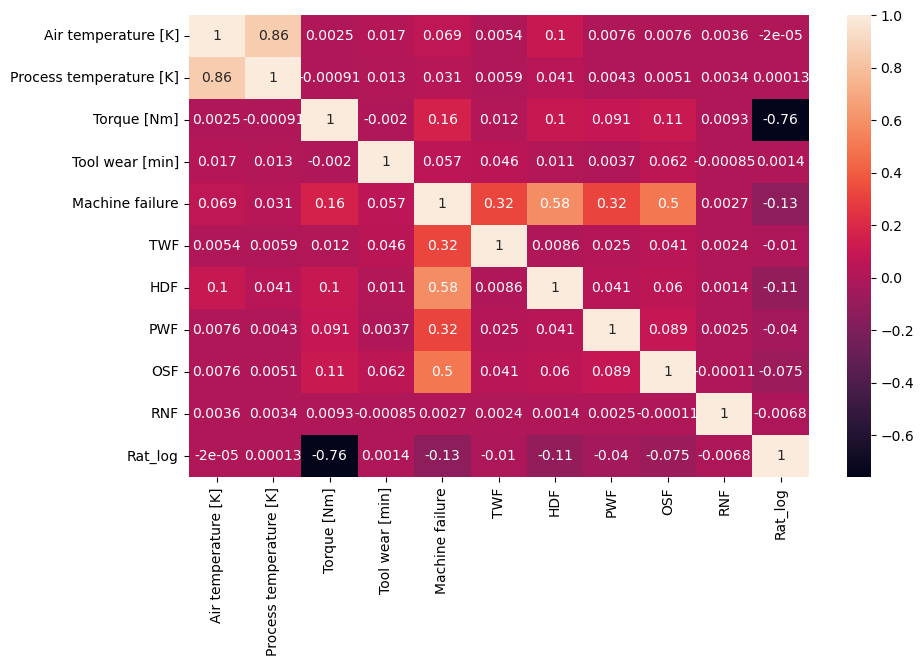

In [24]:
#check for correlation of variables together


plt.figure(figsize=(10,6))
sns.heatmap(data=dftrain.corr(),annot=True)

In [49]:
#there is high correlation between air temperature and process temperature but first do not remove that and remove it after first model performance

In [25]:
dumtrain=pd.get_dummies(dftrain,columns =['Type']
               ,drop_first = True)
dumtest=pd.get_dummies(dftest,columns = ["Type"]
               ,drop_first = True)

In [26]:
#normalization


from sklearn.preprocessing import StandardScaler
#  columns except 'column_to_exclude'
column_to_exclude = 'Machine failure'

# Get the column names to be scaled (excluding the column to exclude)
columns_to_scale = [col for col in dumtrain.columns if col != column_to_exclude]

# Create a new DataFrame with the selected columns
dftrain_scaled = dumtrain.drop(['Machine failure'],axis=1)

# Apply StandardScaler to the selected columns
scaler = StandardScaler()
dftrain_scaled[columns_to_scale] = scaler.fit_transform(dumtrain[columns_to_scale])

#  'column_to_concat'
column_to_concat = dumtrain['Machine failure'] # Example column data

# Concatenate the column to the DataFrame
df_concatenated = pd.concat([dftrain_scaled, column_to_concat], axis=1)

finaltrain=df_concatenated




# Apply StandardScaler to the selected columns in test database
scaler = StandardScaler()
dftest_scaled= scaler.fit_transform(dumtest)



finaltest=pd.DataFrame(dftest_scaled)
finaltrain=df_concatenated

In [27]:
finaltest.info()
finaltrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90954 entries, 0 to 90953
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       90954 non-null  float64
 1   1       90954 non-null  float64
 2   2       90954 non-null  float64
 3   3       90954 non-null  float64
 4   4       90954 non-null  float64
 5   5       90954 non-null  float64
 6   6       90954 non-null  float64
 7   7       90954 non-null  float64
 8   8       90954 non-null  float64
 9   9       90954 non-null  float64
 10  10      90954 non-null  float64
 11  11      90954 non-null  float64
dtypes: float64(12)
memory usage: 8.3 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 127004 entries, 0 to 136428
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Air temperature [K]      127004 non-null  float64
 1   Process temperature [K]  127004 non-null  float64
 

In [43]:
X=finaltrain.drop("Machine failure",axis=1)
y=finaltrain['Machine failure']

from sklearn.metrics import f1_score , confusion_matrix
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the regression models
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier(max_depth=5)  # Set the max_depth parameter for Decision Tree regression
random_forest = RandomForestClassifier(n_estimators=100,max_depth=5)  # Set the n_estimators parameter for Random Forest regression

logistic_regression.fit(X_train,y_train)
prediction0lg0model=logistic_regression.predict(X_test)
print("F1 Score of logistic regression:",f1_score(prediction0lg0model,y_test))
      
      
decision_tree.fit(X_train,y_train)
prediction0dtr0=decision_tree.predict(X_test)
print("F1 Score of dtr:",f1_score(prediction0dtr0,y_test))
      

random_forest.fit(X_train,y_train)
prediction0rf0=random_forest.predict(X_test)
print("F1 Score of rf:",f1_score(prediction0rf0,y_test))

F1 Score of logistic regression: 0.852157943067034
F1 Score of dtr: 0.8500459981600735
F1 Score of rf: 0.8537258509659614


In [44]:
predictiontestcv=random_forest.predict(finaltest)
dfx = pd.DataFrame(predictiontestcv,columns = ['Column_A'])
dfx.to_csv('RandomForesrt0.csv')

C:\Users\mvalavi\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
